DSCI 100 Final Project Proposal
- Dataset: Wine Quality Dataset found on UCI

# Wine Quality Prediction Proposal

### Introduction

For thousands of years, high quality wine-making was an art that demanded recipes and techniques passed down from generations to generation through trial and error. In the past century, rapid scientific advancement has changed the wine-making process through its discovery on how certain ingredients contribute to important chemical reactions in steps like fermentation. 

The dataset used will come from the Wine Quality Dataset found on the UCI Machine Learning Repository, containing the quality and chemical properties of 1599 wine samples from the north of Portugal, named "Vinho Verde" wine. 

In this project, we are aiming to create a regression model that predicts the quality of wine from a scale of 1-8 using 
volatile acidity (level of wine's gaseous acid), density (mass per unit volume of wine), and chloride amount. 



In [36]:
###
### Run this cell before continuing.
###

library(repr)
library(tidyverse)
library(tidymodels)
library(RColorBrewer)
options(repr.matrix.max.rows = 6)
source('tests.R')
source("cleanup.R")

Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'tests.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [37]:
winequalityRed <- read_csv2("data/winequality-red.csv")
winequalityWhite <- read_csv2("data/winequality-white.csv")

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Warning message:
“One or more parsing issues, see `problems()` for details”
Rows: 1599 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (5): volatile acidity, citric acid, chlorides, density, sulphates
dbl (2): total sulfur dioxide, quality

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Rows: 4898 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (6): volatile acidity, citric acid, residual sugar, chlorides, density, ...
dbl (1): quality

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet th

In [38]:
winequalityWhite <- mutate(winequalityWhite, type = "white") |>
                    mutate(winequalityWhite, quality = as.factor(quality))

head(winequalityWhite)


fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<fct>,<chr>
7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,88,6,white
63,0.3,0.34,1.6,0.049,14,132,0.994,33,0.49,95,6,white
81,0.28,0.4,6.9,0.05,30,97,0.9951,326,0.44,101,6,white
72,0.23,0.32,8.5,0.058,47,186,0.9956,319,0.4,99,6,white
72,0.23,0.32,8.5,0.058,47,186,0.9956,319,0.4,99,6,white
81,0.28,0.4,6.9,0.05,30,97,0.9951,326,0.44,101,6,white


In [39]:
winequalityRed <- mutate(winequalityRed, type = "red")|>
                  mutate(winequalityRed, quality = as.factor(quality))
head(winequalityRed)


fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<fct>,<chr>
74,0.7,0,19,0.076,11,34,0.9978,351,0.56,94,5,red
78,0.88,0,26,0.098,25,67,0.9968,32,0.68,98,5,red
78,0.76,0.04,23,0.092,15,54,0.997,326,0.65,98,5,red
112,0.28,0.56,19,0.075,17,60,0.998,316,0.58,98,6,red
74,0.7,0,19,0.076,11,34,0.9978,351,0.56,94,5,red
74,0.66,0,18,0.075,13,40,0.9978,351,0.56,94,5,red


In [40]:
completedt <- rbind(winequalityRed, winequalityWhite)
head(completedt)

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<fct>,<chr>
74,0.7,0,19,0.076,11,34,0.9978,351,0.56,94,5,red
78,0.88,0,26,0.098,25,67,0.9968,32,0.68,98,5,red
78,0.76,0.04,23,0.092,15,54,0.997,326,0.65,98,5,red
112,0.28,0.56,19,0.075,17,60,0.998,316,0.58,98,6,red
74,0.7,0,19,0.076,11,34,0.9978,351,0.56,94,5,red
74,0.66,0,18,0.075,13,40,0.9978,351,0.56,94,5,red


In [41]:
#splitting data into training and testing sets
wine_split <- initial_split(completedt, prop = 0.75, strata = type)
wine_train <- training(wine_split)
wine_test <- testing(wine_split)

In [42]:
#removing spaces from column names makes it easier to work with 
colnames(wine_train) <- make.names(colnames(wine_train), unique = TRUE)
head(wine_train)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,type
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<fct>,<chr>
78,0.88,0,26,0.098,25,67,0.9968,32,0.68,98,5,red
74,0.7,0,19,0.076,11,34,0.9978,351,0.56,94,5,red
74,0.66,0,18,0.075,13,40,0.9978,351,0.56,94,5,red
73,0.65,0,12,0.065,15,21,0.9946,339,0.47,10,7,red
78,0.58,0.02,2,0.073,9,18,0.9968,336,0.57,95,7,red
75,0.5,0.36,61,0.071,17,102,0.9978,335,0.8,105,5,red


In [43]:
#changing the columns to numeric values and removing the non numeric column, "type"
winequality_train <- wine_train |>
               mutate_at(c('volatile.acidity', 'citric.acid','chlorides', 'density', 'sulphates','quality', 'residual.sugar'), as.numeric) |>
               select(-type)|>
               filter(!is.na(total.sulfur.dioxide))
head(winequality_train)



fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
78,0.88,0.00,26,0.098,25,67,0.9968,32,0.68,98,3
74,0.70,0.00,19,0.076,11,34,0.9978,351,0.56,94,3
74,0.66,0.00,18,0.075,13,40,0.9978,351,0.56,94,3
73,0.65,0.00,12,0.065,15,21,0.9946,339,0.47,10,5
78,0.58,0.02,2,0.073,9,18,0.9968,336,0.57,95,5
75,0.50,0.36,61,0.071,17,102,0.9978,335,0.80,105,3


In [44]:
#generating a correlation matrix between all numeric variables 
winequalitycorr <-cor(winequality_train)

head(round(winequalitycorr,2))

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
fixed.acidity,1.00,0.08,0.16,0.12,0.14,-0.02,-0.05,0.20,-0.01,0.16,-0.01,-0.05
volatile.acidity,0.08,1.00,-0.38,0.26,0.38,-0.14,-0.19,0.27,0.05,0.20,0.00,-0.27
citric.acid,0.16,-0.38,1.00,0.00,0.04,0.05,0.08,0.10,-0.06,0.06,0.00,0.09
residual.sugar,0.12,0.26,0.00,1.00,0.20,-0.04,-0.09,0.31,0.01,0.16,0.00,-0.05
chlorides,0.14,0.38,0.04,0.20,1.00,-0.05,-0.10,0.35,-0.01,0.37,0.00,-0.20
free.sulfur.dioxide,-0.02,-0.14,0.05,-0.04,-0.05,1.00,0.46,0.03,0.00,-0.04,0.00,0.00


In [45]:
install.packages("corrplot")           
library("corrplot")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

corrplot 0.92 loaded



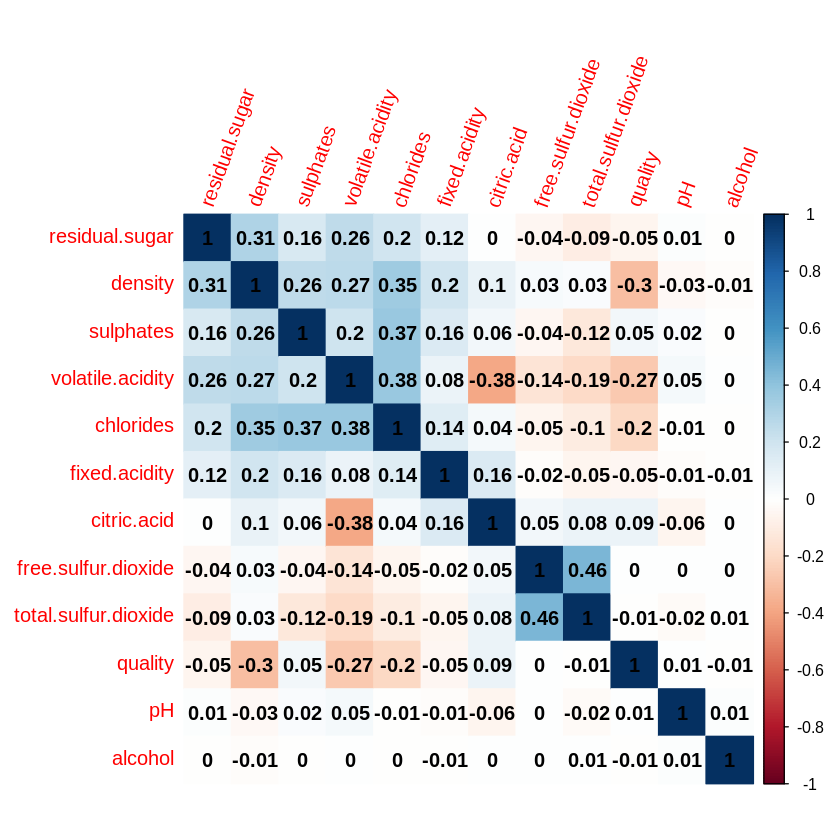

In [47]:
#finding correlation of red and white wine
corrplot(winequalitycorr, method = 'color', order = 'hclust', addCoef.col = 1,  
       tl.cex = 1, number.cex = 1, tl.srt= 70)

In [48]:
#splitting red wine data into training and testing sets
wine_split_red <- initial_split(winequalityRed, prop = 0.75, strata = type)
wine_train_red <- training(wine_split_red)
wine_test_red <- testing(wine_split_red)

In [49]:
colnames(wine_train_red) <- make.names(colnames(wine_train_red), unique = TRUE)
winequalityRed2 <- wine_train_red |>
               mutate_at(c('volatile.acidity', 'citric.acid','chlorides', 'density', 'sulphates','quality', 'residual.sugar'), as.numeric) |>
               select(-type)|>
               filter(!is.na(total.sulfur.dioxide))
winequalityRed3 <-cor(winequalityRed2)

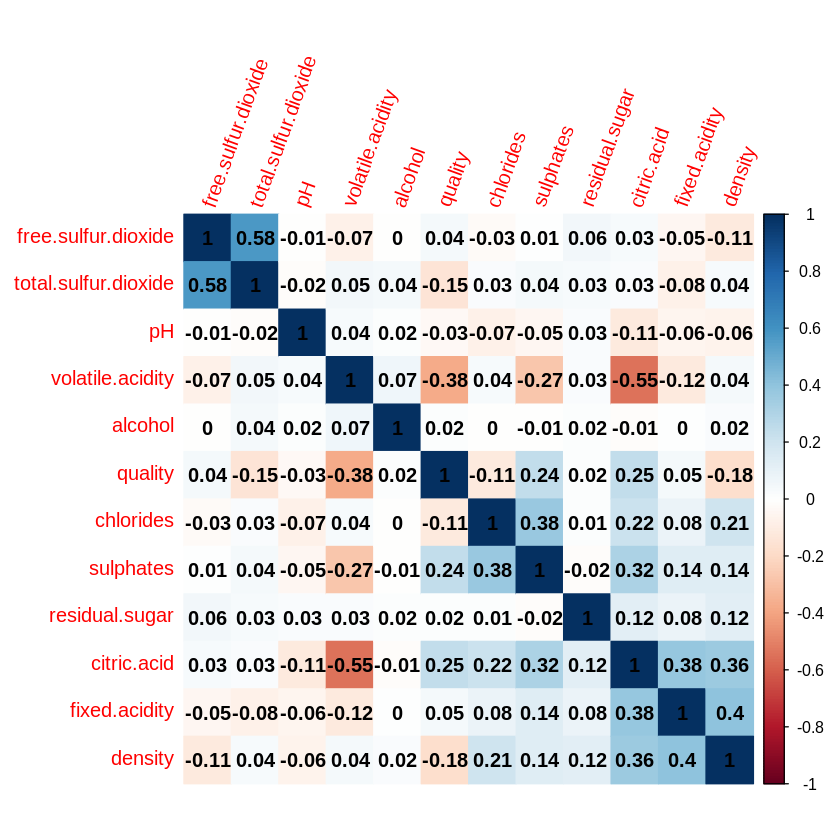

In [51]:
#finding correlation of only red wine
corrplot(winequalityRed3, method = 'color', order = 'hclust', addCoef.col = 1,  
       tl.cex = 1, number.cex = 1, tl.srt= 70)

In [52]:
#splitting white wine data into training and testing sets
wine_split_white <- initial_split(winequalityWhite, prop = 0.75, strata = type)
wine_train_white <- training(wine_split_white)
wine_test_white <- testing(wine_split_white)

In [53]:
colnames(wine_train_white) <- make.names(colnames(wine_train_white), unique = TRUE)
winequalityWhite2 <- wine_train_white |>
               mutate_at(c('volatile.acidity', 'citric.acid','chlorides', 'density', 'sulphates','quality', 'residual.sugar'), as.numeric) |>
               select(-type)|>
               filter(!is.na(total.sulfur.dioxide))
winequalityWhite3 <-cor(winequalityWhite2)

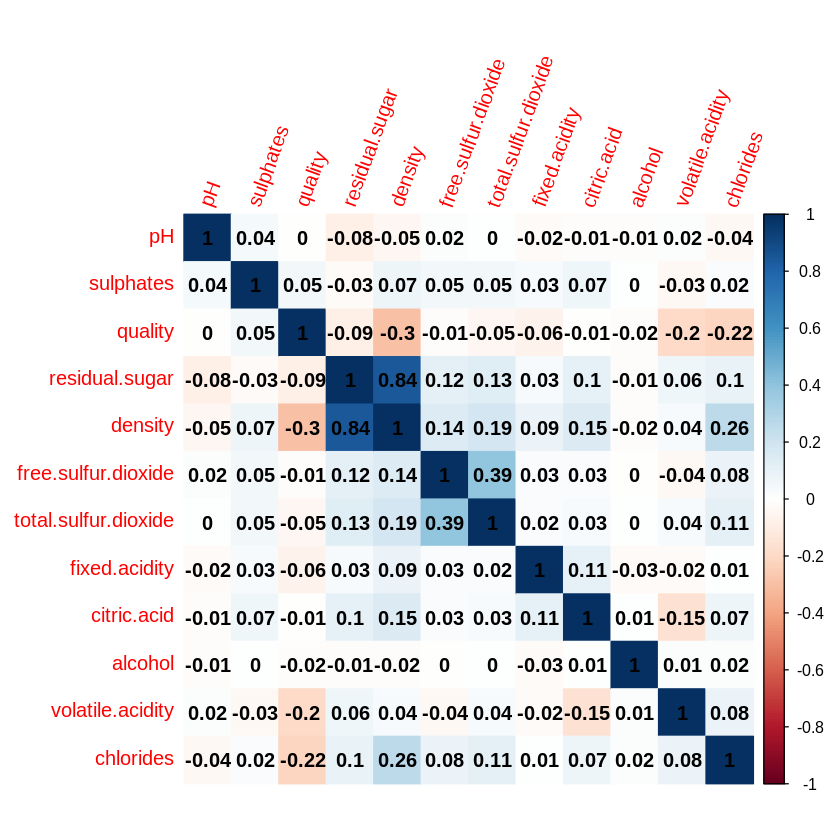

In [55]:
#finding correlation of only white wine
corrplot(winequalityWhite3, method = 'color', order = 'hclust', addCoef.col = 1,  
       tl.cex = 1, number.cex = 1, tl.srt= 70)